## Prince
- Prince is a library for doing factor analysis. 
- This includes a variety of methods including principal component analysis (PCA) and correspondence analysis (CA). 
- The goal is to provide an efficient implementation for each algorithm along with a scikit-learn API.

### Installation
- Prince doesn't have any extra dependencies apart from the usual suspects (sklearn, pandas, matplotlib) which are included with Anaconda.

#### Via PyPI
$ pip install prince

### Guidelines

#### You are supposed to use each method depending on your situation:
- All your variables are numeric: use principal component analysis (prince.PCA)
- You have a **contingency table: use correspondence analysis (prince.CA)
- You have more than 2 variables and they are all categorical: use multiple correspondence analysis (prince.MCA)
- You have groups of categorical or numerical variables: use multiple factor analysis (prince.MFA)
- You have both categorical and numerical variables: use factor analysis of mixed data (prince.FAMD)

#### Contingency Table:
- A contingency table is a tabular representation of categorical data.
- A contingency table usually shows frequencies for particular combinations of values of two discrete random variable s X and Y. 
- Each cell in the table represents a mutually exclusive combination of X-Y values.

- For example, consider a sample of N=200 beer-drinkers. 
- For each drinker we have information on sex 
- (variable X, taking on 2 possible values: "Male" and "Female") and 
- preferred category of beer 
- (variable Y, taking on 3 possible values: "Light", "Regular", "Dark"). 
##### A contingency table for these data might look like the following

|        	| Light 	| Regular 	| Dark 	| Total 	|
|:------:	|-------	|---------	|------	|-------	|
| Male   	| 20    	| 40      	| 50   	| 110   	|
| Female 	| 50    	| 20      	| 20   	| 90    	|
| Total: 	| 70    	| 60      	| 70   	| 200   	|

- This is a two-way 2x3 contingency table (i.e. two rows and three columns).
- Sometimes three-way (and more) contingency tables are used. 
- Suppose the beer-drinkers data, besides sex and preference, are also stratified by age group. 
- The third discrete variable Z ("Age") in this case might, for example, take on 4 values: "65".
- In this case we would have a three-way 2x3x4 contingency table, equivalent to 4 two-way 2x3 contingency tables (one 2x3 table for each of the 4 age-groups).

#### Linear discriminant analysis
Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

In [2]:
import numpy as np
import pandas as pd
import prince 
from sklearn import datasets

In [3]:
X, y = datasets.load_iris(return_X_y=True)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
X = pd.DataFrame(data=X, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
y = pd.Series(y).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
X.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
pca = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

In [10]:
pca

PCA(random_state=42)

In [11]:
pca = pca.fit(X)

In [12]:
pca

PCA(random_state=42)

In [13]:
pca.transform(X).head()  # same as pca.row_coordinates(X).head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


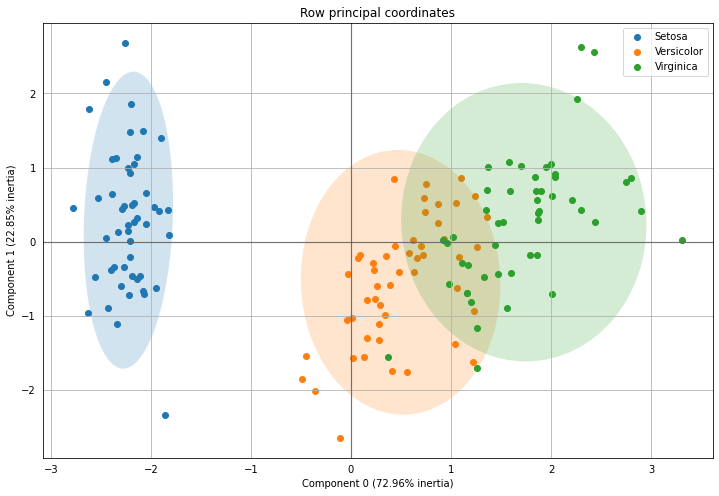

In [15]:
x = pca.plot_row_coordinates(
    X,
    ax=None,
    figsize=(12, 8),
    x_component=0,
    y_component=1,
    labels=None,
    color_labels=y,
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True
)

In [16]:
ax.get_figure().savefig('images/pca_row_coordinates.svg')

NameError: name 'ax' is not defined

In [17]:
pca.explained_inertia_

array([0.72962445, 0.22850762])

In [18]:
pca.eigenvalues_

array([2.91849782, 0.91403047])

In [19]:
pca.total_inertia_

4.000000000000001

In [20]:
pca.explained_inertia_

array([0.72962445, 0.22850762])

In [21]:
pca.column_correlations(X)

,0,1
Petal length,0.991555,0.023415
Petal width,0.964979,0.064000
Sepal length,0.890169,0.360830
Sepal width,-0.460143,0.882716


In [22]:
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

In [23]:
X = pd.DataFrame(
    data=[ [326, 38, 241, 110, 3],
          [688, 116, 584, 188, 4],
          [343, 84, 909, 412, 26],
          [98, 48, 403, 681, 85]
         ],
    columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']),
    index=pd.Series(['Blue', 'Light', 'Medium', 'Dark'])
)
X

,Fair,Red,Medium,Dark,Black
Blue,326,38,241,110,3
Light,688,116,584,188,4
Medium,343,84,909,412,26
Dark,98,48,403,681,85


In [26]:
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
X.columns.rename('Hair color', inplace=True)
X.index.rename('Eye color', inplace=True)


In [27]:
X

Hair color,Fair,Red,Medium,Dark,Black
Eye color,,,,,
Blue,326,38,241,110,3
Light,688,116,584,188,4
Medium,343,84,909,412,26
Dark,98,48,403,681,85


In [28]:
ca = ca.fit(X)

In [29]:
ca

CA(n_iter=3, random_state=42)

In [30]:
ca.row_coordinates(X)

,0,1
Blue,-0.400300,-0.165411
Light,-0.440708,-0.088463
Medium,0.033614,0.245002
Dark,0.702739,-0.133914


In [31]:
ca.column_coordinates(X)

,0,1
Fair,-0.543995,-0.173844
Red,-0.233261,-0.048279
Medium,-0.042024,0.208304
Dark,0.588709,-0.103950
Black,1.094388,-0.286437


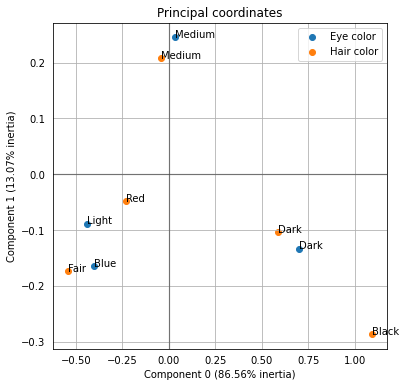

In [32]:
ax = ca.plot_coordinates(
    X=X,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True)

In [33]:
ca.eigenvalues_

[0.19924475202819103, 0.030086774100411752]

In [34]:
ca.total_inertia_

0.23019100748666482

In [35]:
ca.explained_inertia_

[0.8655627090025811, 0.1307035163054956]